In [1]:
%pwd


'/content'

In [2]:
%cd drive/MyDrive/imaging_course/Notebooks/

/content/drive/.shortcut-targets-by-id/1cvJ2Hes9owrL3S12PvcKfeDnl8solhU_/imaging_course/Notebooks


In [3]:
%ls

images/  Lezione1.ipynb  V1_lezioni/


In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import nibabel as nib

In [6]:
mri = nib.load('images/T1.nii.gz')

In [8]:
print(mri.shape)
print(mri.get_data_dtype())
print(mri.header)

(290, 320, 208)
int16
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 290 320 208   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.          0.8         0.8         0.79999995  2.4         0.
  0.          0.        ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 1040.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'FSL4.0'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.99649286
quatern_d       : 0.08367784
qoffset_x  

In [9]:
mri_img = mri.get_fdata()
mri_slice = 128

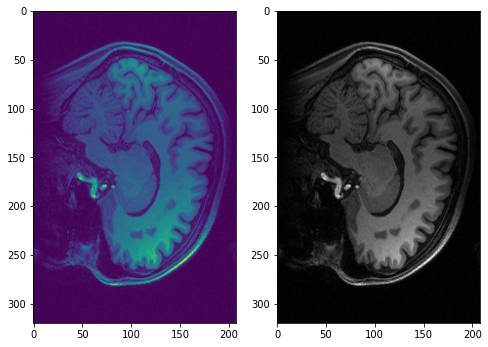

In [10]:
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(mri_img[mri_slice,:,:])
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(mri_img[mri_slice,:,:], cmap = 'gray')

In [11]:
from scipy import ndimage

In [12]:
mri_sagittale = ndimage.rotate(mri_img[mri_slice,:,:], 90, reshape=True)

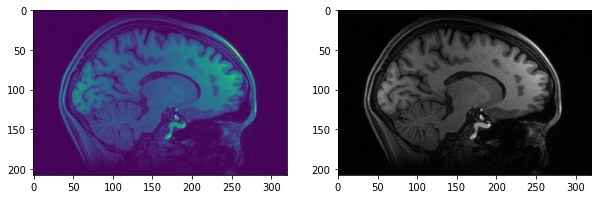

In [13]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(mri_sagittale)
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(mri_sagittale, cmap = 'gray')

In [14]:
mri_frontale = ndimage.rotate(mri_img[:,mri_slice,:], 90, reshape=True)

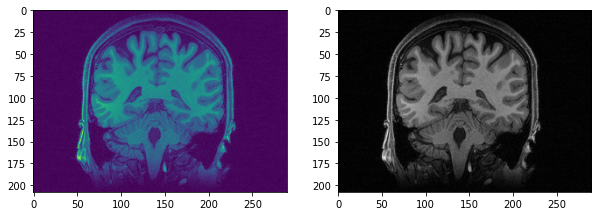

In [15]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(mri_frontale)
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(mri_frontale, cmap = 'gray')

In [16]:
mri_assiale = ndimage.rotate(mri_img[:,:,mri_slice], 90, reshape=True)

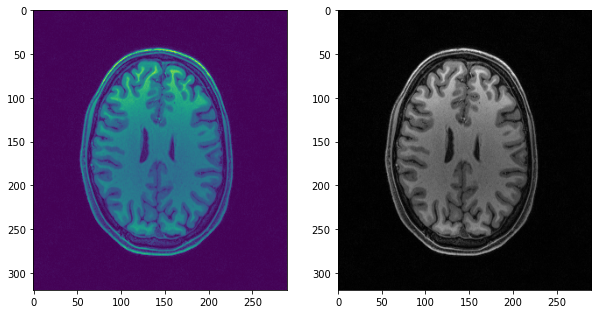

In [17]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(mri_assiale)
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(mri_assiale, cmap = 'gray')

In [18]:
import pydicom 

ModuleNotFoundError: ignored

In [19]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 35.1 MB/s eta 0:00:00


In [20]:
import pydicom

In [21]:
ct = pydicom.dcmread('images/CT.dcm')

In [22]:
print('Numero di righe '+str(ct.Rows))
print('Numero di colonne '+str(ct.Columns))
print('Numero di bit per pixel '+str(ct.BitsAllocated))
print('ID Paziente '+str(ct.PatientID))
print('Pixel Spacing '+str(ct.PixelSpacing))
print('Slice Thickness '+str(ct.SliceThickness))

Numero di righe 512
Numero di colonne 512
Numero di bit per pixel 16
ID Paziente LIDC-IDRI-0004
Pixel Spacing [0.822266, 0.822266]
Slice Thickness 1.250000


In [23]:
ct_img = ct.pixel_array

In [24]:
print('Tipo: '+str(type(ct_img)))
print('Tipo di dato ' +str(ct_img.dtype))
print('Dimensioni' +str(ct_img.shape))

Tipo: <class 'numpy.ndarray'>
Tipo di dato int16
Dimensioni(512, 512)


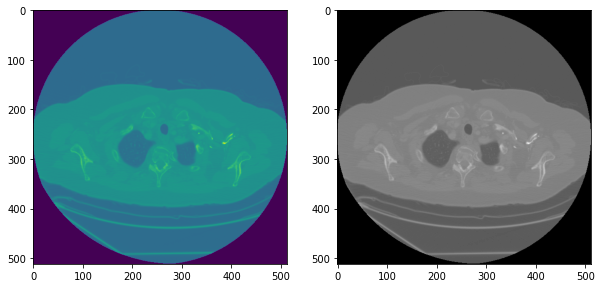

In [25]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(ct_img)
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(ct_img, cmap = 'gray')

In [26]:
import PIL.Image as tiff

In [27]:
isto = tiff.open('images/isto.tif') 

In [28]:
isto

In [29]:
isto_img = np.asarray(isto)

In [30]:
print('Dimensioni '+str(isto_img.shape))

Dimensioni (4794, 6072, 3)


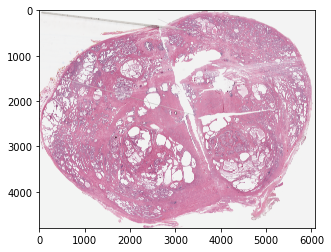

In [31]:
plt.imshow(isto_img)

Text(0.5, 1.0, 'B')

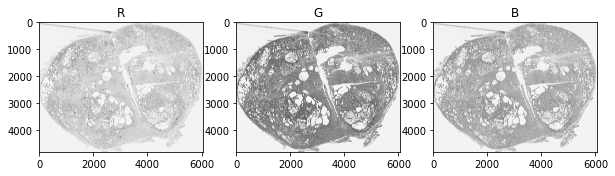

In [32]:
fig = plt.figure(figsize=(10,10))
a = fig.add_subplot(1,3,1)
imgplot = plt.imshow(isto_img[:,:,0], cmap = 'gray')
plt.title('R')
a = fig.add_subplot(1,3,2)
imgplot = plt.imshow(isto_img[:,:,1], cmap = 'gray')
plt.title('G')
a = fig.add_subplot(1,3,3)
imgplot = plt.imshow(isto_img[:,:,2], cmap = 'gray')
plt.title('B')

In [33]:
import cv2 

In [34]:
nat = cv2.imread('images/poli.jpeg')

In [35]:
print(nat.shape)

(548, 805, 3)


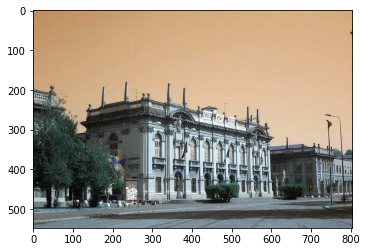

In [36]:
plt.imshow(nat)

In [37]:
nat1 = cv2.cvtColor(nat, cv2.COLOR_BGR2RGB)

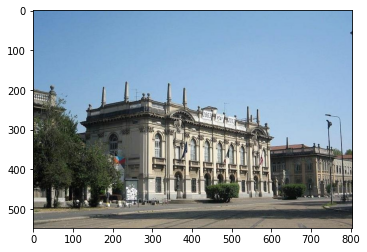

In [38]:
plt.imshow(nat1)

In [39]:
cv2.imwrite('images/test.png', ct_img)

True

In [48]:
import skimage.transform
import os
from scipy.ndimage import zoom
from skimage import exposure

import pydicom as dicom

In [55]:
pat_path_1 = '/content/drive/MyDrive/imaging_course/Notebooks/images/1'
pat_path_2 = '/content/drive/MyDrive/imaging_course/Notebooks/images/2'
dcm_ext = '.dcm'

In [56]:
print(pat_path_1)

/content/drive/MyDrive/imaging_course/Notebooks/images/1


In [57]:
img_vol = []
for path, _, files in sorted(os.walk(pat_path_1)): 
  for filename in (sorted(files)): 
      if filename.endswith (dcm_ext):
        print (filename)
        img_dcm_std = dicom.dcmread(os.path.join(pat_path_1,filename))

        img = img_dcm_std.pixel_array
        img_vol.append (img)
    
  z_space = img_dcm_std.SpacingBetweenSlices
  x_space = img_dcm_std.PixelSpacing [0]
  y_space = img_dcm_std.PixelSpacing [1]
  vox_dim_1 = (x_space, y_space, z_space)

  img_vol_raw_1 = np.array (img_vol)
    

IMG-0004-00002.dcm
IMG-0004-00004.dcm
IMG-0004-00006.dcm
IMG-0004-00008.dcm
IMG-0004-00010.dcm
IMG-0004-00012.dcm
IMG-0004-00014.dcm
IMG-0004-00016.dcm
IMG-0004-00018.dcm
IMG-0004-00020.dcm
IMG-0004-00022.dcm
IMG-0004-00024.dcm
IMG-0004-00026.dcm
IMG-0004-00028.dcm
IMG-0004-00030.dcm
IMG-0004-00032.dcm
IMG-0004-00034.dcm
IMG-0004-00036.dcm
IMG-0004-00038.dcm
IMG-0004-00040.dcm
IMG-0004-00042.dcm
IMG-0004-00044.dcm
IMG-0004-00046.dcm
IMG-0004-00048.dcm
IMG-0004-00050.dcm
IMG-0004-00052.dcm
IMG-0004-00054.dcm
IMG-0004-00056.dcm
IMG-0004-00058.dcm
IMG-0004-00060.dcm
IMG-0004-00062.dcm
IMG-0004-00064.dcm
IMG-0004-00066.dcm
IMG-0004-00068.dcm
IMG-0004-00070.dcm


In [58]:
img_vol = []
for path, _, files in sorted(os.walk(pat_path_2)): 
  for filename in (sorted(files)): 
      if filename.endswith (dcm_ext):
        print (filename)
        img_dcm_std = dicom.dcmread(os.path.join(pat_path_2,filename))

        img = img_dcm_std.pixel_array
        img_vol.append (img)
    
  z_space = img_dcm_std.SpacingBetweenSlices
  x_space = img_dcm_std.PixelSpacing [0]
  y_space = img_dcm_std.PixelSpacing [1]
  vox_dim_2 = (x_space, y_space, z_space)

  img_vol_raw_2 = np.array (img_vol)

IMG-0010-00002.dcm
IMG-0010-00004.dcm
IMG-0010-00006.dcm
IMG-0010-00008.dcm
IMG-0010-00010.dcm
IMG-0010-00012.dcm
IMG-0010-00014.dcm
IMG-0010-00016.dcm
IMG-0010-00018.dcm
IMG-0010-00020.dcm
IMG-0010-00022.dcm
IMG-0010-00024.dcm
IMG-0010-00026.dcm
IMG-0010-00028.dcm
IMG-0010-00030.dcm
IMG-0010-00032.dcm
IMG-0010-00034.dcm
IMG-0010-00036.dcm
IMG-0010-00038.dcm
IMG-0010-00040.dcm
IMG-0010-00042.dcm
IMG-0010-00044.dcm
IMG-0010-00046.dcm
IMG-0010-00048.dcm
IMG-0010-00050.dcm
IMG-0010-00052.dcm


In [59]:
print ('Original image 1 shape: ', img_vol_raw_1.shape)
print ('Original image 2 shape: ', img_vol_raw_2.shape)
print ('Voxel dimension image 1: ', vox_dim_1)
print ('Voxel dimension image 2: ', vox_dim_2)

Original image 1 shape:  (35, 256, 256)
Original image 2 shape:  (26, 288, 288)
Voxel dimension image 1:  ('1.89453125', '1.89453125', '5.5')
Voxel dimension image 2:  ('1.44097220897674', '1.44097220897674', '9.0')


In [60]:
mid_slice_1 = int(np.round(img_vol_raw_1.shape[0]/2))
mid_slice_2 = int(np.round(img_vol_raw_2.shape[0]/2))
print ('Middle slice image 1: ', mid_slice_1)
print ('Middle slice image 2: ', mid_slice_2)

Middle slice image 1:  18
Middle slice image 2:  13


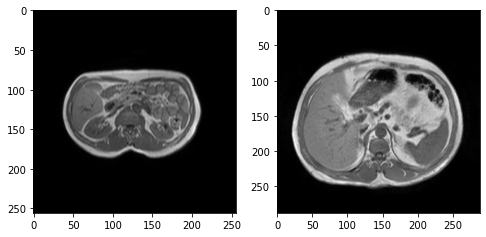

In [61]:
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(img_vol_raw_1 [mid_slice_1, :, :], cmap = 'gray')
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(img_vol_raw_2 [mid_slice_2, :, :], cmap = 'gray')

In [62]:
target_resolution = [1, 1, 1]
scale_vector_1 = (vox_dim_1[0]/target_resolution[0], vox_dim_1[1]/target_resolution[1], vox_dim_1[2]/target_resolution[2])
scale_vector_2 = (vox_dim_2[0]/target_resolution[0], vox_dim_2[1]/target_resolution[1], vox_dim_2[2]/target_resolution[2])

In [63]:
isotr_img_1 = skimage.transform.rescale(img_vol_raw_1, scale_vector_1, order=3, preserve_range=True,  mode='constant')
isotr_img_2 = skimage.transform.rescale(img_vol_raw_2, scale_vector_2, order=3, preserve_range=True,  mode='constant')


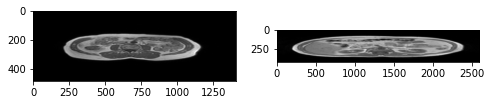

In [64]:
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(isotr_img_1 [mid_slice_1, :, :], cmap = 'gray')
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(isotr_img_2 [mid_slice_2, :, :], cmap = 'gray')

In [65]:
isotr_img_shape_1 = isotr_img_1.shape
isotr_img_shape_2 = isotr_img_2.shape
print ('Rescaled image 1 shape: ', isotr_img_shape_1)
print ('Rescaled image 2 shape: ', isotr_img_shape_2)

Rescaled image 1 shape:  (66, 485, 1408)
Rescaled image 2 shape:  (37, 415, 2592)


In [66]:
target_shape = [192, 192, 192]

factors_1 = (
          target_shape[0]/isotr_img_shape_1[0],
          target_shape[1]/isotr_img_shape_1[1], 
          target_shape[2]/isotr_img_shape_1[2]
          )

factors_2 = (
          target_shape[0]/isotr_img_shape_2[0],
          target_shape[1]/isotr_img_shape_2[1], 
          target_shape[2]/isotr_img_shape_2[2]
          )

isotr_reshaped_img_1 = zoom (isotr_img_1, factors_1, order=3, mode= 'nearest')
isotr_reshaped_img_2 = zoom (isotr_img_2, factors_2, order=3, mode= 'nearest')

In [67]:
reshaped_img_shape_1 = isotr_reshaped_img_1.shape
reshaped_img_shape_2 = isotr_reshaped_img_2.shape
print ('Reshaped image 1 shape: ', reshaped_img_shape_1)
print ('Reshaped image 2 shape: ', reshaped_img_shape_2)

Reshaped image 1 shape:  (192, 192, 192)
Reshaped image 2 shape:  (192, 192, 192)


In [68]:
mid_slice_1 = int(np.round(reshaped_img_shape_1[0]/2))
mid_slice_2 = int(np.round(reshaped_img_shape_2[0]/2))
print ('Middle slice image 1: ', mid_slice_1)
print ('Middle slice image 2: ', mid_slice_2)

Middle slice image 1:  96
Middle slice image 2:  96


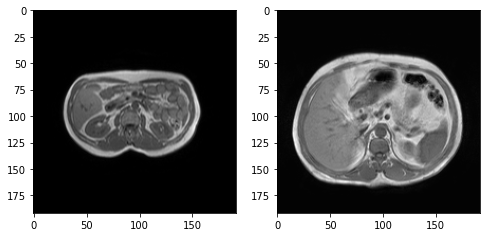

In [69]:
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(1,2,1)
imgplot = plt.imshow(isotr_reshaped_img_1 [mid_slice_1, :, :], cmap = 'gray')
a = fig.add_subplot(1,2,2)
imgplot = plt.imshow(isotr_reshaped_img_2 [mid_slice_2, :, :], cmap = 'gray')

Text(0.5, 1.0, 'Image Histogram')

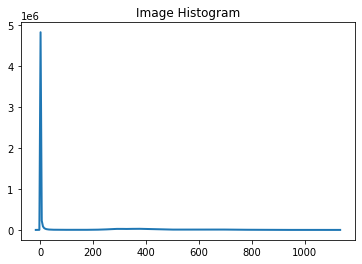

In [70]:
hist, bins_center = exposure.histogram(isotr_reshaped_img_1)
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

Text(0.5, 1.0, 'Image Histogram')

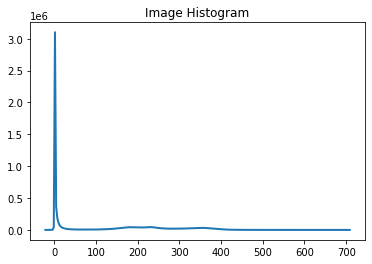

In [71]:
hist, bins_center = exposure.histogram(isotr_reshaped_img_2)
plt.plot(bins_center, hist, lw=2)
plt.title('Image Histogram')

In [72]:
# zero_mean
img_o = np.float32(isotr_reshaped_img_1.copy())
m = np.mean(img_o)
s = np.std(img_o)
normalized_img = np.divide((img_o - m), s)


In [73]:
# div_by_max
perc1 = np.percentile(isotr_reshaped_img_1,1)
perc99 = np.percentile(isotr_reshaped_img_1,99)
normalized_img = np.divide((isotr_reshaped_img_1 - perc1), (perc99 - perc1))
normalized_img[normalized_img < 0] = 0.0
normalized_img[normalized_img > 1] = 1.0

In [74]:
# min_max
norm_image = cv2.normalize(isotr_reshaped_img_1, None, alpha = 0, beta = 255, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8UC1)

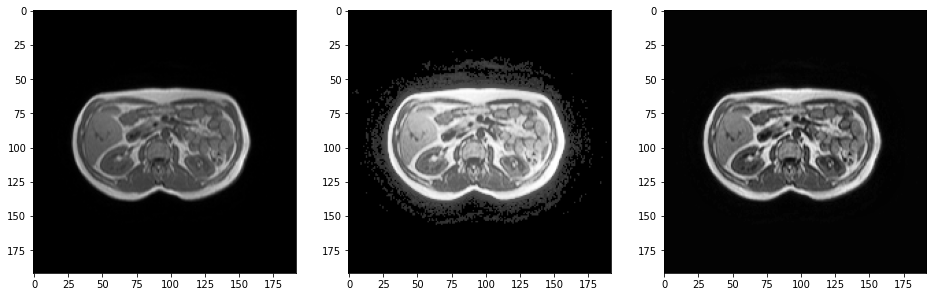

In [75]:
eq_img_1 = cv2.equalizeHist(norm_image [mid_slice_1, :, :])
clahe_img = cv2.createCLAHE (clipLimit = 2.0, tileGridSize = (8, 8))
clahe_img_1 = clahe_img.apply (norm_image[mid_slice_1, :, :])

fig = plt.figure(figsize=(16,16))
a = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(norm_image [mid_slice_1, :, :], cmap = 'gray')
a = fig.add_subplot(1, 3, 2)
imgplot = plt.imshow(eq_img_1, cmap = 'gray')
a = fig.add_subplot(1, 3, 3)
imgplot = plt.imshow(clahe_img_1, cmap = 'gray')

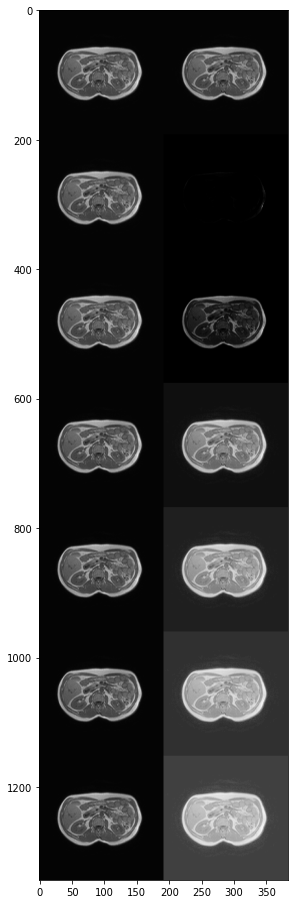

In [76]:
corr_imgs = np.hstack([norm_image [mid_slice_1, :, :], norm_image [mid_slice_1, :, :]])

for gamma in np.arange(0.0, 3.5, 0.5):
  # ignore when gamma is 1 (there will be no change to the image)
  if gamma == 1:
    continue
    
  gamma = gamma if gamma > 0 else 0.1
  invGamma = 1.0 / gamma
  
  table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
  #print (table)
  # apply gamma correction using the lookup table
  adjusted = cv2.LUT(norm_image [mid_slice_1, :, :], table)
  corr_imgs_1 = np.hstack([norm_image [mid_slice_1, :, :], adjusted])
  corr_imgs = np.vstack ([corr_imgs, corr_imgs_1])

fig = plt.figure(figsize=(16,16))
plt.imshow(corr_imgs, cmap = 'gray')